**Estimate cost of Medical Insurance**

In [10]:
# # Method-1Using dataset
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [11]:
#  Method-2
#  Downloading the dataset
medical_charges_url='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [12]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical_insurance.csv')

('medical_insurance.csv', <http.client.HTTPMessage at 0x7ca27dffe650>)

In [13]:
import pandas as pd

In [14]:
medical_df = pd.read_csv(medical_charges_url)
display(medical_df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
medical_df.sample()

,age,sex,bmi,children,smoker,region,charges
735,49,female,34.77,1,no,northwest,9583.8933


In [16]:
# Our objective is to find a way to estimate the value in the 'charges' column using the values in the
# other columns.If we can do so for the historical data, then we should be able to estimate the charges for
# new customers too, simply by asking for information like: their age,sex, BMI, no. of children, smoking
# habits and region

# Lets check the datatype for each column
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# Looks like "age","bmi","children","charges" are numerical and datatypes like "sex","smoker"
# and "region" are strings (possibbly categories).None of the columns contains any missing values
# which will now save a fair bit of work in preprocessing.

# Here are some statistics for the numerical columns
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


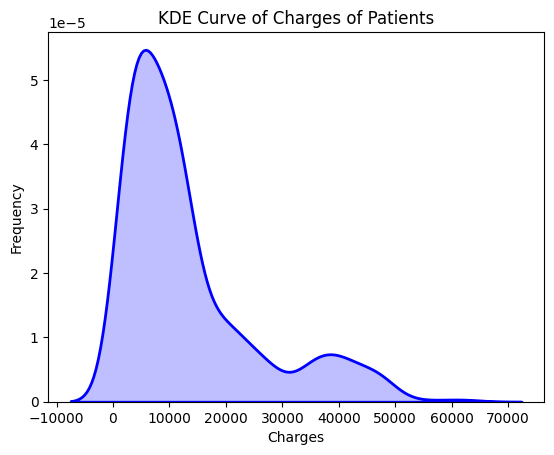

In [18]:
# The ranges of values in the numerical columns seem reasonable too(no negative ages)
# so we may not have to do much data cleaning or correction.
# The "charges " column seems to be signifcantly skewed however, as the median (50%)
# is much lower than the maximum value

import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(medical_df['charges'],color='blue', linewidth=2, fill=True)
plt.title('KDE Curve of Charges of Patients')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


**Exploratory Analysis and Visulaization**


Lets explore the data by visualizing the distribution of values in some columns of the dataset and the relationships between 'charges' and other columns.

Use of Matplotlib, Seaborn and Plotly for visualization

In [19]:
# pip install matplotlib
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline could be used when the output is shown as pop-up
# till now not shown when the situation arises we will use it

Improving the default styles of charts

In [20]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

**Age**
Age is a numeric column.
The mininmum age is 18 and maximum is 64(from df.describe output)
Thus we can visualize these ages using histplot with 47 bins(64-18+1)(one for each year) and a box plot

In [21]:
fig=px.histogram(medical_df,
                 x='age',
                 marginal='box',
                 title='Distribution of Ages',
                 nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

From the above graph on Ages
There is uniform distribution of ages except for age 18 and 19
which is  around twice as other ages

**Body Mass Index**
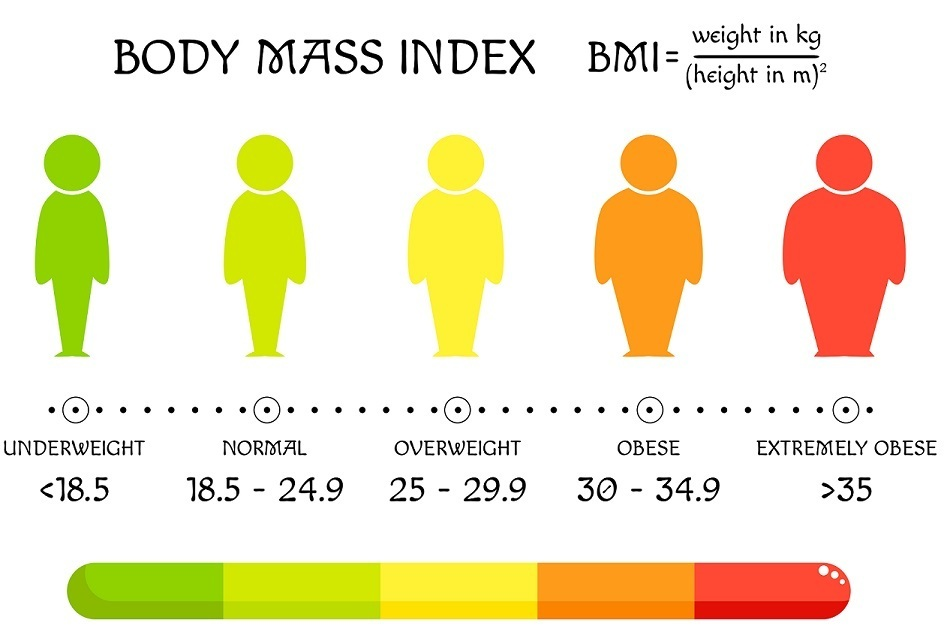


In [22]:
fig=px.histogram(medical_df,
                 x="bmi",
                 marginal="box",
                 color_discrete_sequence=['grey'],
                 title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

Above distribution is like a Gaussian/Noraml distribution
Most bmi is 25-35

**Charges**
Lets visulaize the distribution of charges i.e. annual medical charges for customers.
This is the actual we are trying to predict
Lets also use the categorical value smoker to distinguish between the charges for smokers and non-smokers


In [23]:
fig=px.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='smoker',
                 color_discrete_sequence=['red','green'],
                 title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

**Observations**
1)The graph is not having a normal distribution
2)Smoker and Non-smoker clearly makes a difference
3)Non-smoker has a median of 7.3k whereas Smoker has a
median of 34.5k
4)Non-smokers pay on an average pay between 4-11k
5)Smokers pay on an average pay between 21-41k

Distribution follows 'POWER LAW'

**Relation between Sex and Charges?**

In [24]:
fig=px.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='sex',
                 color_discrete_sequence=['red','green'],
                 title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

**Observations**
No significant relation between sex and charges
Just the male has more charges may be due to actual population is greater than women

Relation between Charges and region

In [25]:
print(medical_df['region'].unique())
fig=px.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='region',
                 color_discrete_sequence=['red','green','blue','orange'],
                 title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

['southwest' 'southeast' 'northwest' 'northeast']


**Observations**
No such relation between region and charges

**Age and Charges**


In [26]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='Age v/s Charges')

fig.update_traces(marker_size=5)
fig.show()

**Observations**
Cluster is grwoing incrementally
non-somker has less charges compared to smoker
Some of Non-smokers has more may be due to disease,accidents,genetic disease,etc

**BMI v/s Charges**

In [27]:
fig=px.scatter(medical_df,
               x='bmi',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['bmi'],
               title='BMI v/s Charges')

fig.update_traces(marker_size=5)
fig.show()

**Observations**
1)Increase in BMI and Charges being a smoker is directly proportional

**Charges v/s Children**

In [28]:
fig=px.violin(medical_df,x='children',y='charges')
fig.show()

**Correlation Coefficient**
We will know that how one columns is correlated to other columns, like if particular value of a columns increases then other column values may also increase or decrease or have no impact

Correlation can only be performed between two numerical columns not categorical.

Extremen Values -1 to 1
Strong Positive Correlation:1
Negative Correlation:-1
No correlation: 0

In [29]:
print("Correlation between Charges and age: ",medical_df.charges.corr(medical_df.age))
print("Correlation between Charges and BMI: ",medical_df.charges.corr(medical_df.bmi))
print("Correlation between Charges and Children: ",medical_df.charges.corr(medical_df.children))
# print("Correlation between Charges and age: ",medical_df.charges.corr(medical_df.smoker))
# Smoker is a categorical column we need to convert it into Numerical column

Correlation between Charges and age:  0.2990081933306476
Correlation between Charges and BMI:  0.19834096883362895
Correlation between Charges and Children:  0.06799822684790478


In [30]:
# We may use Label Encoding or One-Hot encoding
# here i am using a quick method  by just mapping yes and no to 1 and 0
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


<Axes: >

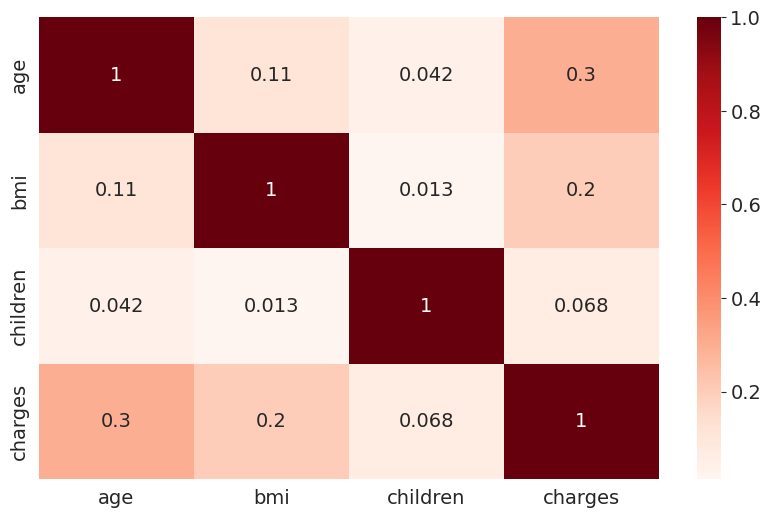

In [31]:
# We can also use Heatmap to find relation
medical_numerical_df=medical_df.drop(['sex','smoker','region'],axis=1)
sns.heatmap(medical_numerical_df.corr(),annot=True,cmap='Reds')

**Linear Regression using a Single feature**

Smoker and Age has strog relation with Charges

Finding a way to estimate the value of 'charges' using the value of 'age' for non-smokers

In [32]:
non_smoker_df=medical_df[medical_df.smoker=='no'];

**Age v/s Charges**

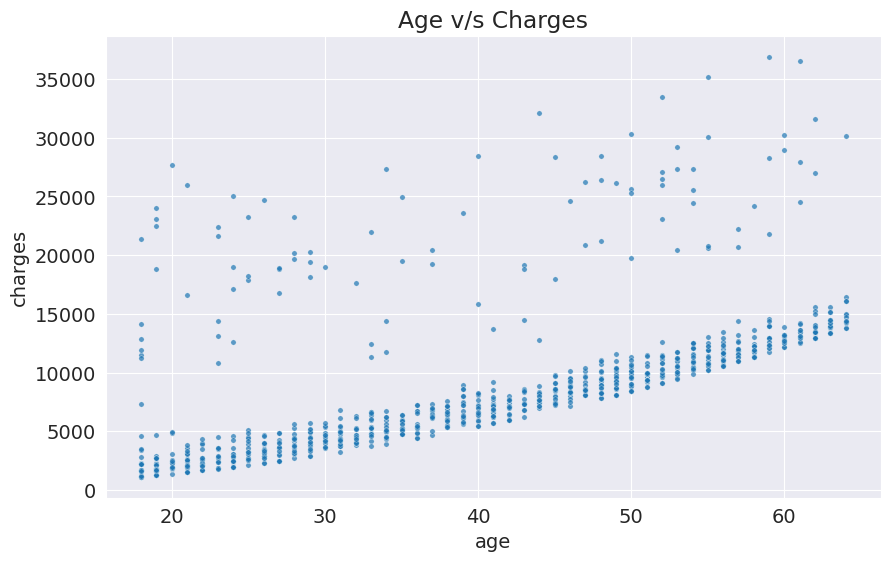

In [33]:
plt.title('Age v/s Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)
plt.show()

**Observations**

We can fit a line as per diagram

**Model**

IN the above case, the x axis shows 'age' and the y axis shows 'charges'.
Thus, we're assuming the following relationship between the two:

 *charges=w * age+b*

We'll try determine w and b for the line that best fits the data.



*   This technique is called linear regression, and we call the above equation a *linear regresion model*, because it models the relationship between 'age' and 'charges' as a straight line.

*   The numbers w and b are called parameters or weights of the model.

*   The value in the 'age' column of the dataset are called the inputs to the model and the values in the charges column are called "targets"

Let define a helper function estimate_charges to compute charges,given age,w and b



In [34]:
 def estimate_charges(age,w,b):
  return w*age+b

**estimate_charges** is our first model
let us give random values to w and b

In [35]:
w=50
b=100

In [36]:
estimated_charges=estimate_charges(40,w,b)
estimated_charges

2100

In [37]:
ages=non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [38]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [39]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


We can plot the estimated charges using line graph

Text(0, 0.5, 'Estimated Charges')

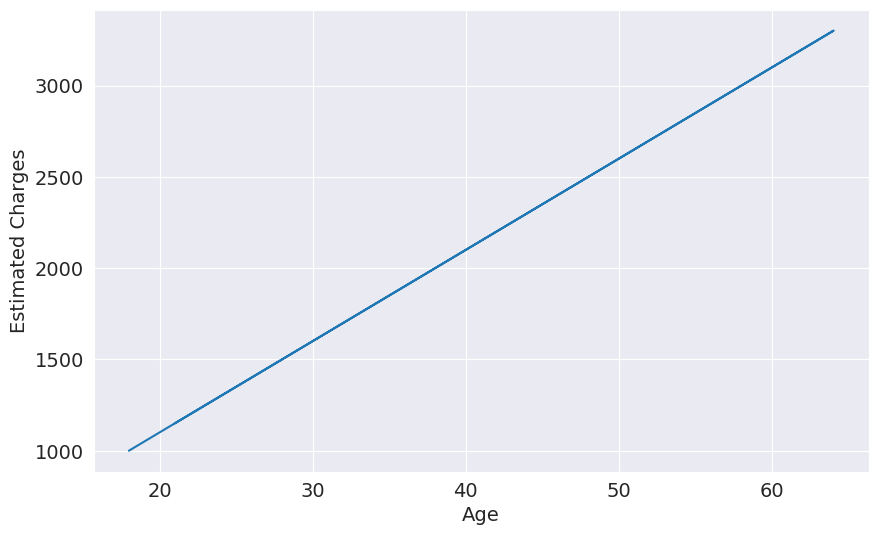

In [40]:
plt.plot(ages,estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

As expected, the points lie on a straight line
We can overlay this line on the actual data, so see how well our model fits the data

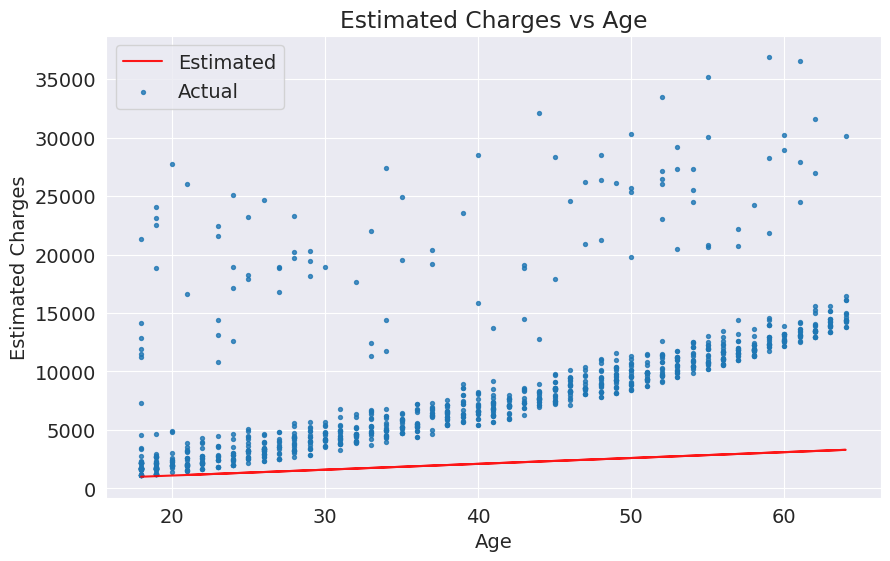

In [41]:
# Combining the actual data with our result

# Actual data
target=non_smoker_df.charges

# Estimation
plt.plot(ages,estimated_charges,'r',alpha=0.9)

plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.title('Estimated Charges vs Age')
plt.legend(['Estimated','Actual'])
plt.show()

**Observations**
CLearly, our estimates are quite poor and the line does not "fit" the data.
However, we can try different values of *w* and *b* to move the line around. Let's define a helper function try_parameters which takes *w* and *b* as inputs and creates the above plot

In [42]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges

  estimated_charges=estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate','Actual'])

Trying to fit the line by changing the values of w and b

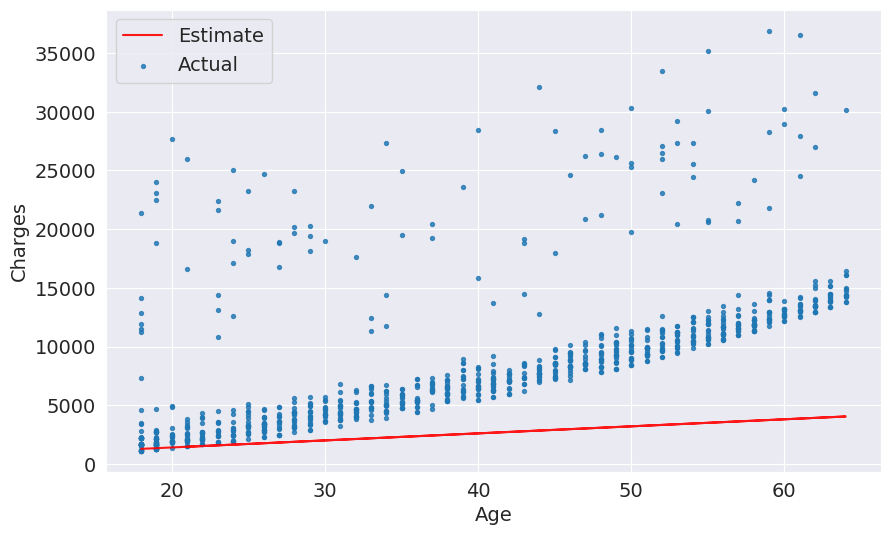

In [43]:
try_parameters(60,200)

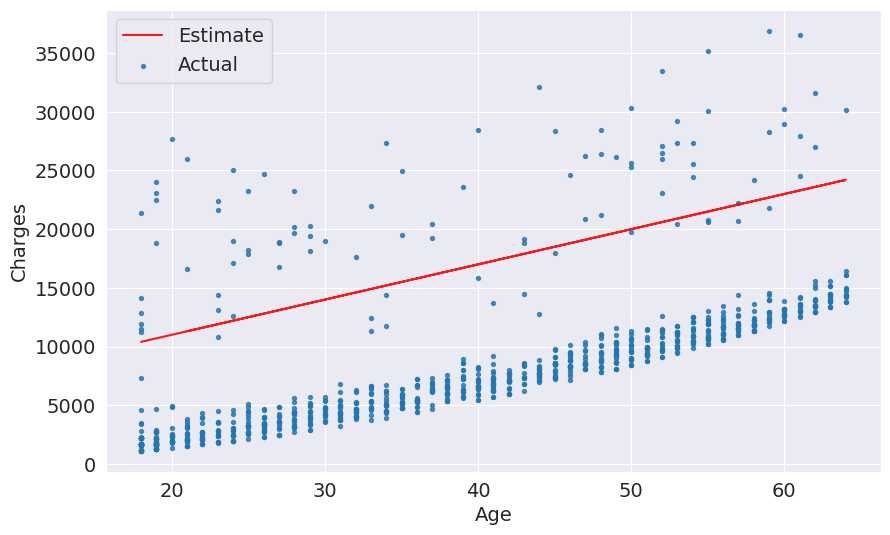

In [44]:
try_parameters(300,5000)

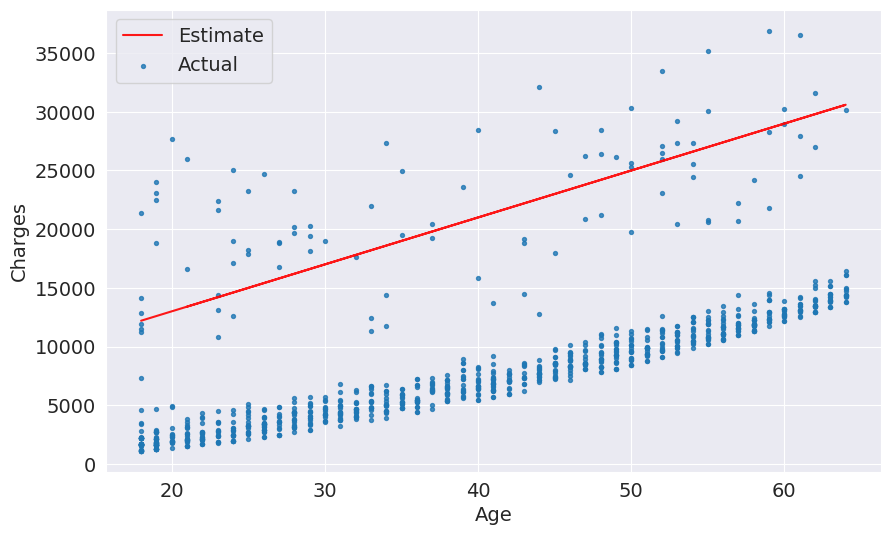

In [45]:
try_parameters(400,5000)

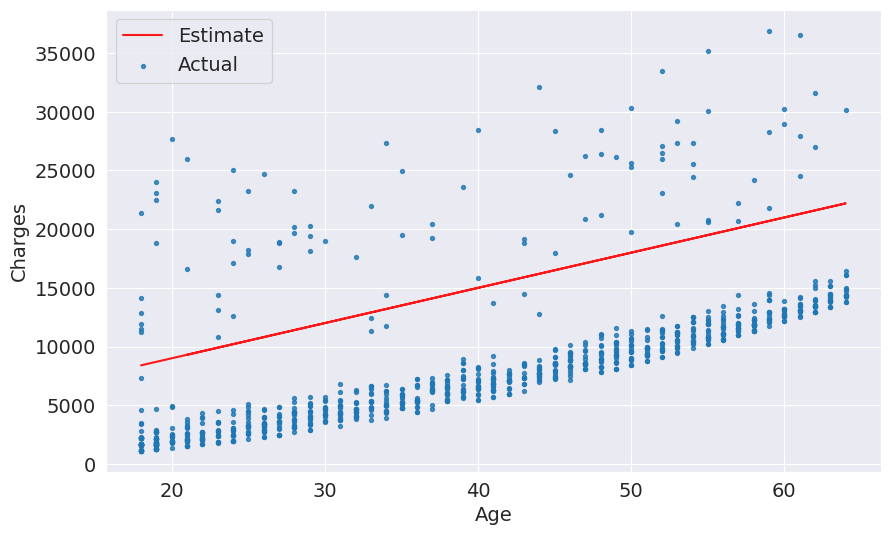

In [46]:
try_parameters(300,3000)

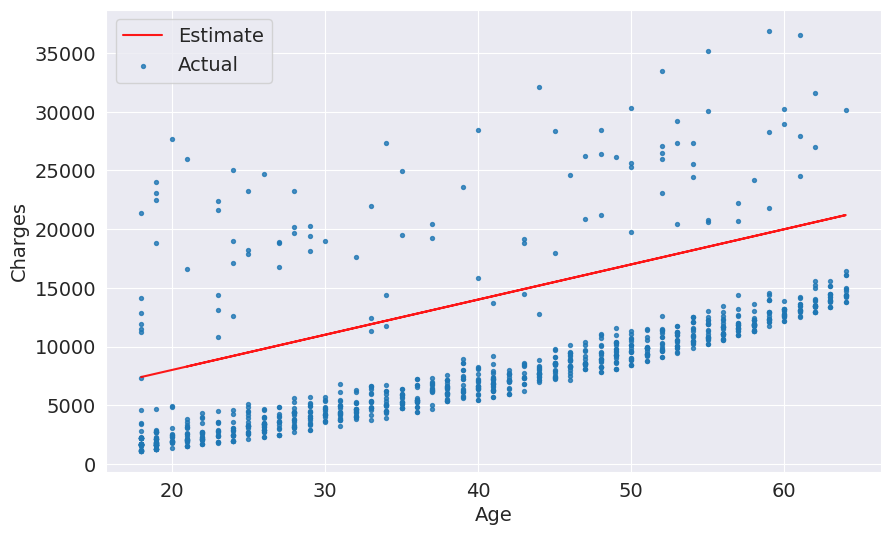

In [47]:
try_parameters(300,2000)

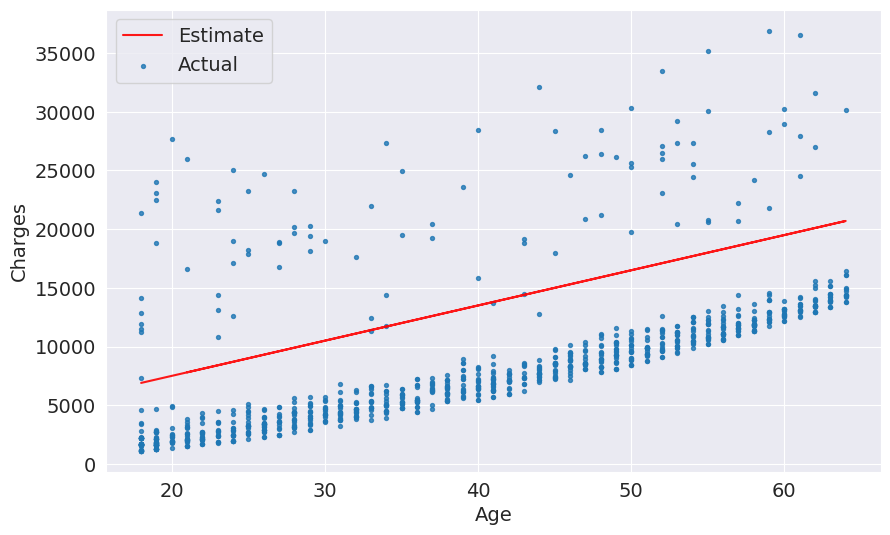

In [48]:
try_parameters(300,1500)

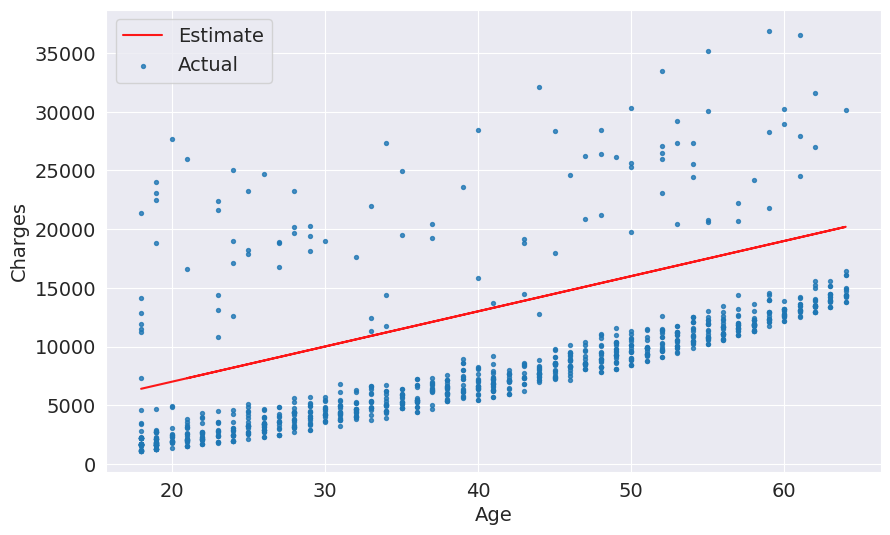

In [49]:
try_parameters(300,1000)

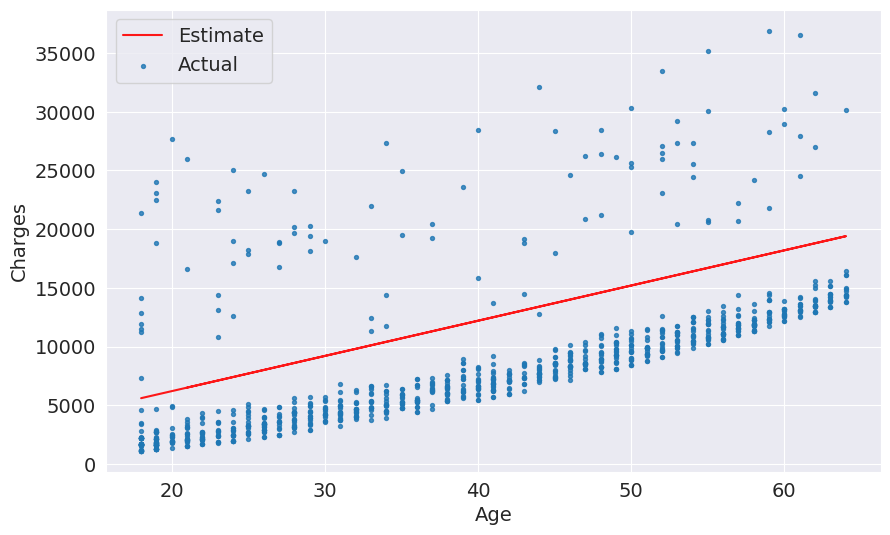

In [50]:
try_parameters(300,200)

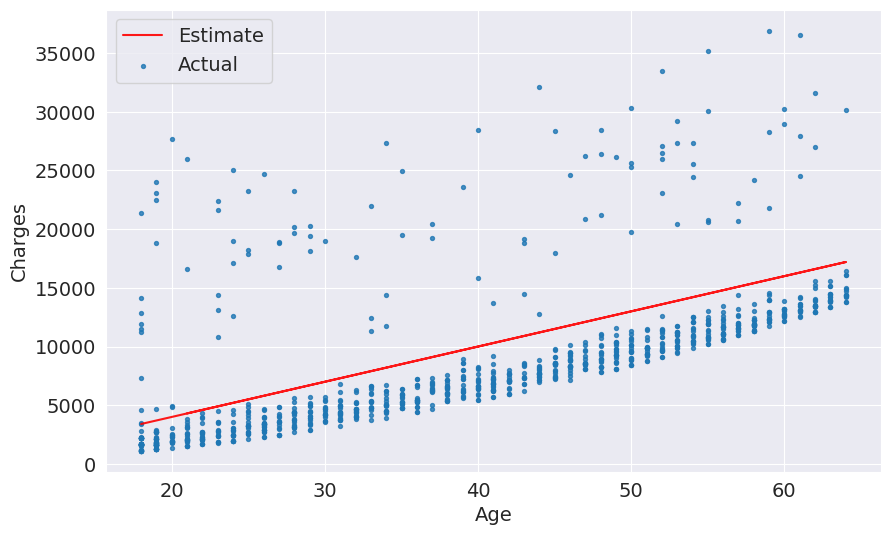

In [51]:
try_parameters(300,-2000)

As we change the values, of *w* and *b* manually, trying to move the line visually closer to the points, we are learning the approximate relationship between 'age' and 'charges'

Wouldn't it be nice if a computer could try several different values of *w* and *b* and learn the relaitonship between 'age' and 'charges'?To do this, we need to solve a couple of problems:


1.   We need a way to measure numerically how well the line fits the points
2.   Once the 'measure of fit' has been computed, we need a way to modify *w* and *b* to improve the fit

If we can solve the above problems, it should be possible for a computer to determine *w* and *b* for the best fit line, starting from a random guess.



In [52]:
targets=non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [53]:
predictions=estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


# Loss/Cost Function
we can compare our model's predicitons with the actual targets using following method:


*   Calculate the difference between the targets and predictions (the difference is called the 'residual')
*   Sqaure all elements of the difference to remove negative values
*   Calculate the average of the elements in the resulting matrix
*   Take the square root of the element

The result is a single number known as the root mean squared error (RMSE). the above description can be stated mathematically as follows:


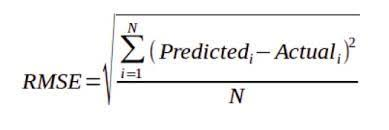


Geometrically, the residuals can be visualized as follows:

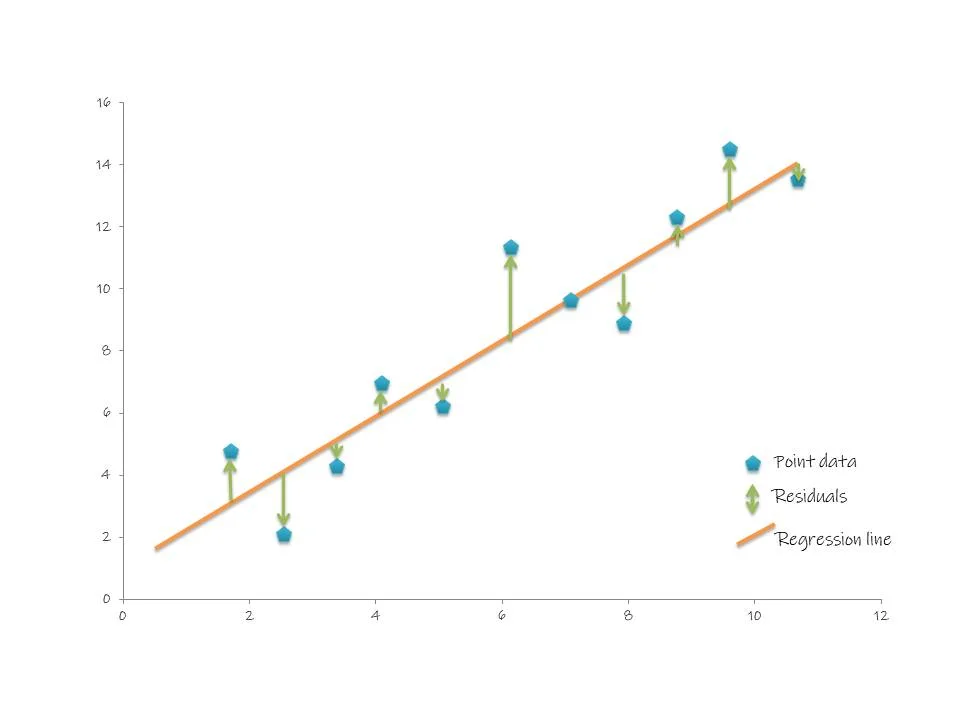

Lets define a funciton and compute the RMSE

In [54]:
import numpy as np

In [55]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

Let's compute the RMSE for our model with the sample set of weights

In [56]:
w=50
b=100

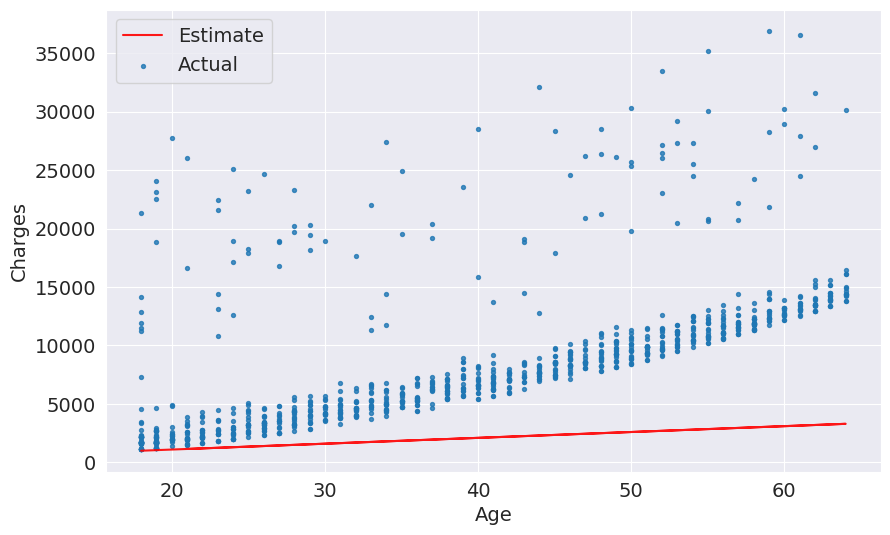

In [57]:
try_parameters(w,b)

In [58]:
targets=non_smoker_df.charges
predicted=estimate_charges(non_smoker_df.age,w,b)

In [59]:
rmse(targets,predicted)

np.float64(8461.949562575493)

Here's how we can interpret the above number.
On average, each element in the predictions differ from the actual target by $8461.

The result is called the loss because it indicated how bad the model is predicting the target variables. It represents information loss in the model: *the lower the loss, the better the model*

In [60]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges

  predictions=estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['[Predictions','Actual'])

  loss=rmse(target,predictions)
  print(f'RMSE={loss}')

RMSE=4701.206270955806


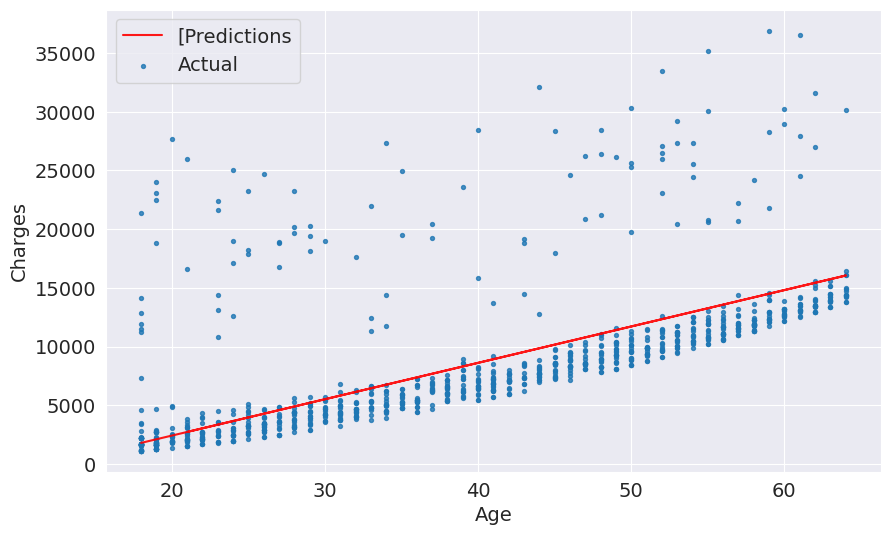

In [61]:
try_parameters(310,-3790)

We have before tried for vaious values of *w* and *b*
After so many manual efforts we have come up with above values

Ohh! it is taking too much time now,
Lets look for some technique to optimize this error
Some technique which will give the best *w* and *b* so that error is minimized

# Optimizer
 Next, we need a strategy to modify the weights w and b to reduce the loss and improve the 'fit' of the line to the data



*   Ordinary Least Square(better for smaller dataset)
*   Stochastic Gradient Descent(better for larger dataset)

Both of these have the same objectives: To minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while the gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives

Here's a visualization of how gradient descent works:
![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)
 Doesn't it look similar to our own strategy of gradually moving the line closer to the points?

# Linear Regression using Scikit-learn
In practice, we will need to implement either of the above methods by ourself.
We can use a library like sickit-learn to do this for us

In [62]:
# pip install scikit-learn

Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" v/s "charges" using the ordinary least square optimization technique

In [63]:
from sklearn.linear_model import LinearRegression

First, we create a new model object

In [64]:
model=LinearRegression()

Now, we can use the fit method of the model to find the best fit line for the input and targets

In [65]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [66]:
inputs=non_smoker_df[['age']]  # we need a dataframe so in a tuple and not just(non_smoker_df['age'])
targets=non_smoker_df.charges
print("Input shape: ",inputs.shape)
print("target shape: ",targets.shape)

Input shape:  (1064, 1)
target shape:  (1064,)


Now we are telling below that fit the model where you minimize the error, first start with random values of w and b and then keep on modifying till we can not fit the line further

In [67]:
model.fit(inputs,targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23,37 and 61

In [69]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

After comparing the results with the scatter plot, Looks like it is matching a bit

In [71]:
predictions=model.predict (inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [74]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Let's compute the RMSE loss to evaluate the model

In [75]:
rmse(targets,predictions)

np.float64(4662.505766636395)

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers

The parameters of the model are stored in the coef_ and intercept_ properties

In [77]:
model.coef_

array([267.24891283])

In [78]:
model.intercept_

np.float64(-2091.4205565650864)

Lets try to plot the graph as per the model's decided values of w(coef_) and b(intercept_)

RMSE=4662.505766636395


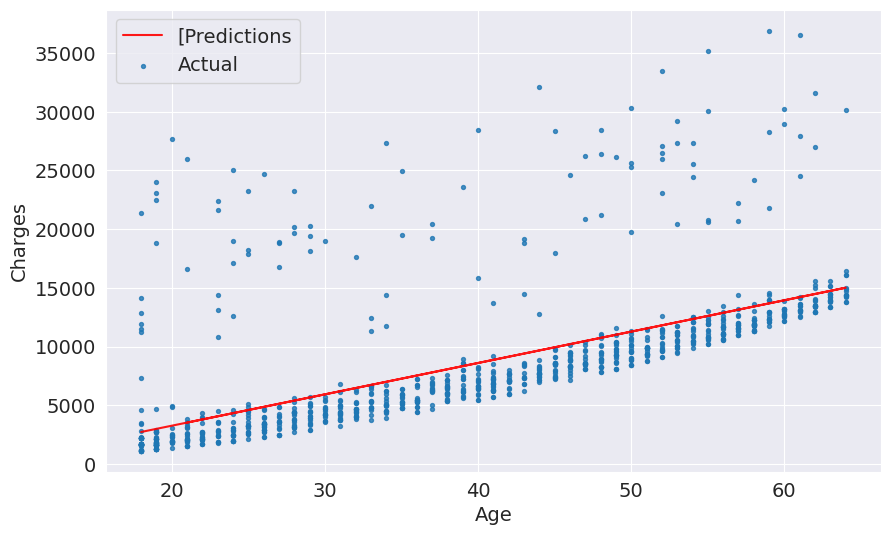

In [79]:
try_parameters(model.coef_,model.intercept_)

# Trying another gradient
Using the SGDRegressor class from the scikit-learn to train a model using stochastic gradient descent technique.Make predictions and compute the loss.

In [80]:
from sklearn.linear_model import SGDRegressor

In [82]:
sgd=SGDRegressor()

In [84]:
sgd.fit(inputs,targets)

SGDRegressor()

In [86]:
predictions2=sgd.predict(inputs)

In [89]:
predictions2

array([4761.26637641, 6094.9525569 , 6761.79564714, ..., 4761.26637641,
       4761.26637641, 5161.37223055])

In [91]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [93]:
rmse(sgd.coef_,sgd.intercept_)

np.float64(2227.262633478183)

We can see there is so difference between both linearRegression

RMSE=5095.5393401634565


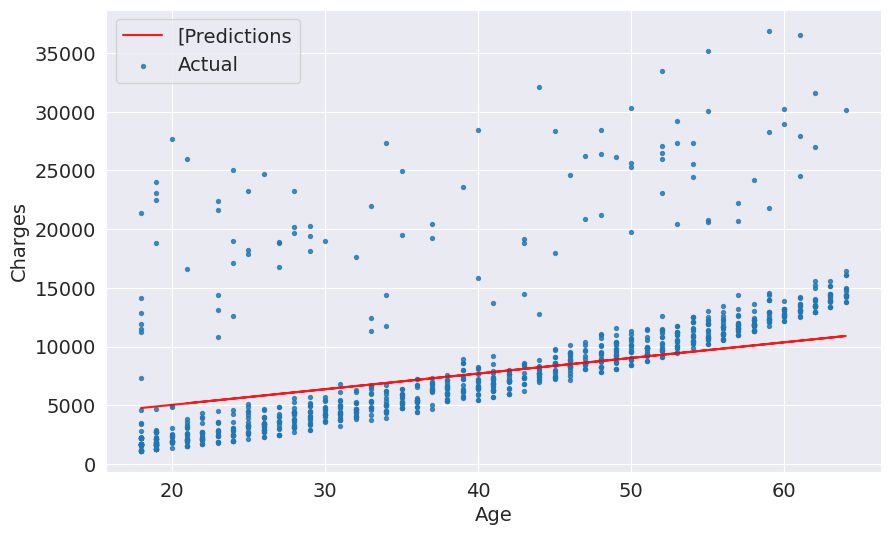

In [95]:
try_parameters(sgd.coef_,sgd.intercept_)